<a href="https://colab.research.google.com/github/Aishwarya2311/Deep-Learning/blob/main/Regression_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from warnings import filterwarnings
filterwarnings('ignore')


Step 1: Read the dataset

In [37]:
import pandas as pd
url = "https://raw.githubusercontent.com/Aishwarya2311/Deep-Learning/main/PowerPlant.csv"
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


Step 2: Perform basic data quality checks

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [39]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [40]:
df.duplicated().sum()

41

In [41]:
df.duplicated().sum()/len(df)

0.004285117056856187

In [42]:
df = df.drop_duplicates(keep='first')
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


In [43]:
df.duplicated().sum()

0

Seperate X and Y (PE)

In [44]:
X = df.drop(columns=['PE'])
Y = df[['PE']]

In [45]:

X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [46]:


Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


Step 4: Preprocess X using pipeline

In [47]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [49]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scale', StandardScaler())]).set_output(transform='pandas')


In [50]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()



,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837



Apply Train Test split

In [51]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)


In [52]:
xtrain.head()

,AT,V,AP,RH
5703,-0.152905,0.324507,0.089713,1.817999
7322,-1.497611,-1.153542,0.323712,0.908830
9105,-0.885038,-0.954892,0.293410,0.988245
6436,1.398679,1.223949,-0.479290,-1.082031
6790,-0.824586,-0.942279,0.796758,1.506499


In [53]:
ytrain.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [54]:

xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [55]:

ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [56]:

xtrain.shape

(7621, 4)

In [57]:
xtest.shape

(1906, 4)

In [58]:

xtrain.shape[0]

7621

In [59]:

xtrain.shape[1]

4

Step 5: Build the neural network

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [61]:
# Intialize the model
model = Sequential()

# Add input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add Dense Hidden Layer 1
model.add(Dense(16, activation='relu'))

# Add Hidden layer 2
model.add(Dense(8, activation='relu'))

# Add output layer
model.add(Dense(1, activation='linear'))

In [62]:
# Compile the model
model.compile(loss="mse", metrics=["mae"], optimizer="adam")

In [63]:
hist = model.fit(xtrain, ytrain,
                 validation_data=(xtest, ytest),
                 epochs=60)

Epoch 1/60
239/239 [==============================] - 2s 4ms/step - loss: 203611.8750 - mae: 450.8980 - val_loss: 195970.7344 - val_mae: 442.3340
Epoch 2/60
239/239 [==============================] - 1s 4ms/step - loss: 172869.6406 - mae: 414.7436 - val_loss: 139565.4219 - val_mae: 372.2360
Epoch 3/60
239/239 [==============================] - 1s 4ms/step - loss: 98248.2891 - mae: 304.9971 - val_loss: 57913.3320 - val_mae: 225.9646
Epoch 4/60
239/239 [==============================] - 1s 4ms/step - loss: 37719.3203 - mae: 170.8575 - val_loss: 24563.2715 - val_mae: 133.4862
Epoch 5/60
239/239 [==============================] - 1s 4ms/step - loss: 21466.0059 - mae: 125.2257 - val_loss: 18249.0391 - val_mae: 115.4152
Epoch 6/60
239/239 [==============================] - 1s 4ms/step - loss: 16299.3623 - mae: 109.0347 - val_loss: 13708.9092 - val_mae: 100.0130
Epoch 7/60
239/239 [==============================] - 1s 4ms/step - loss: 11708.4297 - mae: 92.3379 - val_loss: 9391.3203 - val_mae:

In [64]:
hist.history["loss"]

[203611.875,
 172869.640625,
 98248.2890625,
 37719.3203125,
 21466.005859375,
 16299.3623046875,
 11708.4296875,
 7572.43603515625,
 4321.5810546875,
 2250.42724609375,
 1180.509765625,
 676.8346557617188,
 442.8455505371094,
 327.9544677734375,
 260.9015808105469,
 215.6015625,
 183.30868530273438,
 158.06419372558594,
 136.92672729492188,
 118.14429473876953,
 101.5633544921875,
 87.3536605834961,
 75.36734008789062,
 65.31429290771484,
 56.914405822753906,
 49.800846099853516,
 43.87895965576172,
 38.97860336303711,
 34.42301940917969,
 30.642452239990234,
 27.594579696655273,
 25.132713317871094,
 23.42192840576172,
 22.211639404296875,
 21.395463943481445,
 20.76727294921875,
 20.33945655822754,
 19.990985870361328,
 19.714927673339844,
 19.604507446289062,
 19.353775024414062,
 19.259103775024414,
 19.33527946472168,
 19.27107810974121,
 19.036054611206055,
 18.953662872314453,
 19.04033088684082,
 18.868581771850586,
 18.894207000732422,
 18.794883728027344,
 18.857744216918945

In [65]:
hist.history['val_loss']

[195970.734375,
 139565.421875,
 57913.33203125,
 24563.271484375,
 18249.0390625,
 13708.9091796875,
 9391.3203125,
 5693.57763671875,
 3061.080322265625,
 1579.02587890625,
 860.6360473632812,
 535.4849243164062,
 380.3507385253906,
 297.2237548828125,
 243.41575622558594,
 205.2375030517578,
 176.6598663330078,
 152.35671997070312,
 131.5846710205078,
 114.19621276855469,
 97.87471008300781,
 84.04582214355469,
 72.47700500488281,
 63.57593536376953,
 54.51854705810547,
 47.87686538696289,
 42.38982391357422,
 37.478458404541016,
 33.917903900146484,
 29.917612075805664,
 26.875722885131836,
 24.43488883972168,
 22.688831329345703,
 21.829240798950195,
 20.87337303161621,
 20.404865264892578,
 20.12930679321289,
 19.660354614257812,
 19.69586181640625,
 20.279436111450195,
 19.28948211669922,
 19.841110229492188,
 19.193767547607422,
 18.782888412475586,
 19.225933074951172,
 18.586395263671875,
 18.70442771911621,
 18.69739532470703,
 19.431615829467773,
 18.684946060180664,
 19.42

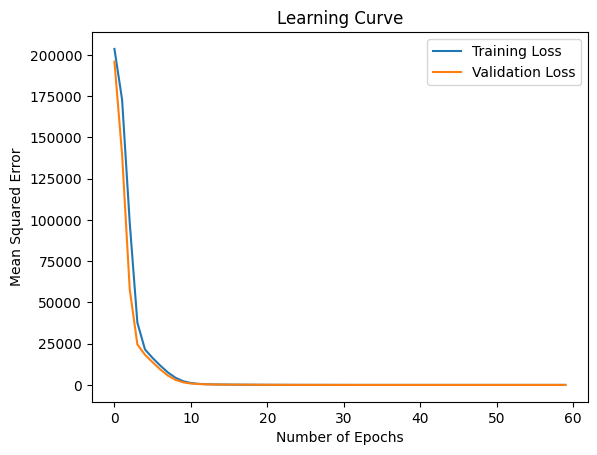

In [66]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [67]:

model.evaluate(xtrain, ytrain)

239/239 [==============================] - 1s 2ms/step - loss: 18.4590 - mae: 3.3793


[18.45897102355957, 3.379269599914551]

In [68]:
model.evaluate(xtest, ytest)

60/60 [==============================] - 0s 2ms/step - loss: 18.3903 - mae: 3.4126


[18.390274047851562, 3.4126014709472656]

Predict the results for train and test

In [69]:

ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 1ms/step


In [70]:

ypred_train[0:5]

array([[451.00516],
       [479.2475 ],
       [468.27335],
       [432.39188],
       [465.65253]], dtype=float32)

In [71]:

ytrain.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [72]:

ypred_test[0:5]

array([[429.17947],
       [481.2044 ],
       [479.40347],
       [449.5222 ],
       [446.07254]], dtype=float32)

In [73]:

# R2 score in train
from sklearn.metrics import r2_score
r2_score(ytrain, ypred_train)

0.9357781346476733

In [74]:
# R2 score in test
r2_score(ytest, ypred_test)

0.9390626121335143

Because I have r2 score > 0.8 for both train and test i can use above model for out of sample prediction

In [76]:
url2="https://raw.githubusercontent.com/Aishwarya2311/Deep-Learning/main/test_PowerPlant.csv"
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [77]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [78]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [79]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 [==============================] - 0s 3ms/step


array([[444.9584 ],
       [439.7243 ],
       [433.08383],
       [440.1705 ],
       [470.92548]], dtype=float32)

In [80]:
xnew["PowerOutput_pred"] = preds

In [81]:
xnew

,AT,V,AP,RH,PowerOutput_pred
0,22.49,58.82,1009.73,85.19,444.958405
1,28.88,54.89,1007.16,46.60,439.724304
2,27.89,73.21,1001.32,85.88,433.083832
3,25.69,62.26,1011.38,74.08,440.170502
4,12.16,40.81,1025.79,70.97,470.925476
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,436.851685
96,11.78,39.96,1011.37,82.95,472.982269
97,5.62,41.38,1020.91,86.21,484.404877
98,24.96,74.99,1008.25,80.52,436.259308


<Axes: xlabel='PowerOutput_pred', ylabel='Count'>

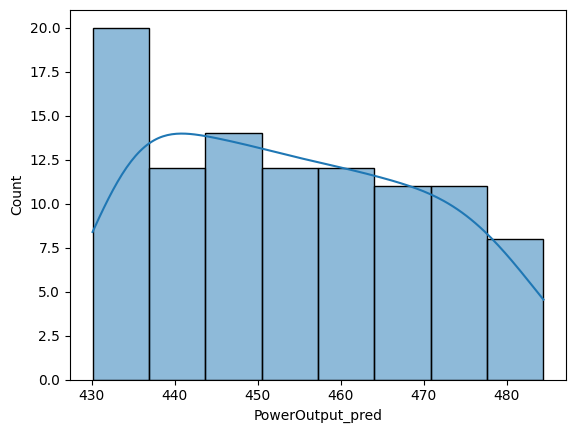

In [82]:


import seaborn as sns
sns.histplot(data=xnew, x="PowerOutput_pred", kde=True)

In [83]:
xnew.to_csv("Results.csv", index=False)